# Machine Learning Algorithms

## 3. Clustering 
Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters

### K-means
- KMeans can be seen as a special case of Gaussian mixture model with equal covariance per component
- Separates samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares
- Requires specified number of clusters

Algorithm has three steps;
1. The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X. After initialization, K-means consists of looping between the two other steps
2. After initialization, K-means consists of looping between the two other steps
3. Difference between the old and the new centroids are computed. Rinse and repeat

- The output is highly dependent on the initialisation centroids (i.e. converges to local optima). Enable parameters to allow random initialisations.  

##### Advantages
- Easy to use interpret 
- Quite fast

##### Disadvantages
- Assumes clusters are convex and isotropic
- Not a normalized metric; just know that lower values are better and zero is optimal
- In very high-dimensional spaces, Euclidean distances tend to become inflated (“curse of dimensionality”). Address using 'elbow' method to find optimal k for decent variance explained

#### Mini Batch K-Means
Faster version Mini Batch uses a subset of the input data, randomly sampled in each training iteration. These drastically reduce the amount of computation at little cost of accuracy

Examine the effects of specification for K-Means below
- Experiment with different number of clusters
- Observe the impact of anisotropic clusters
- Observe impacct of unequal variance; its confused as to where to draw boudary (2,3 clusters) 


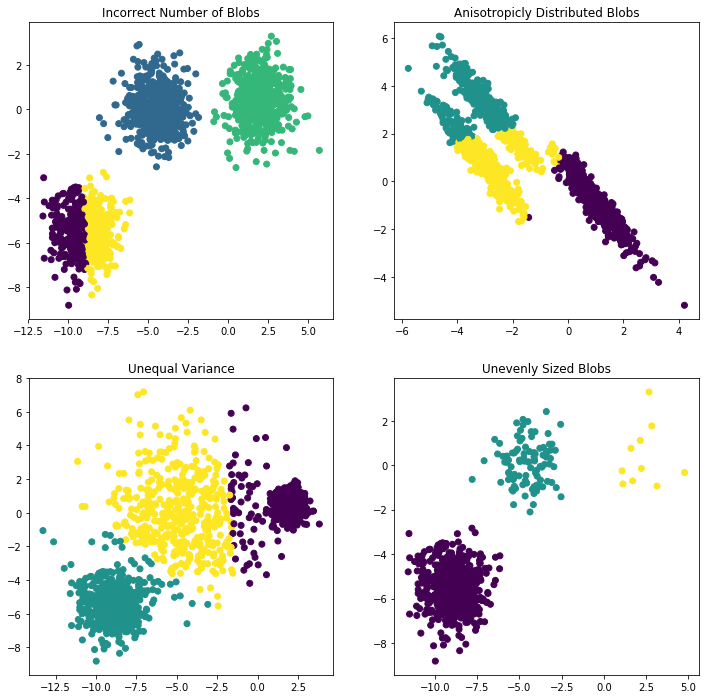

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

### Affinity Propagation
- AP Creates clusters by sending messages between pairs of samples until convergence 
- Does not require the number of clusters to be determined before running the algorithm
- Works by iteratively refining a randomly-chosen initial set of exemplars
- It takes in a set of pairwise similarities between data points and finds clusters on by maximizing the total similarity between data points and their exemplars

Examine the below AP algorithm
- Preference - controls how many exemplars are used
- Damping factor - damps the responsibility and availability messages to avoid numerical oscillations when updating

- *Mutual information - quantifies the amount of information obtained about one random variable through observing the other random variable*
- *Completeness - if the data points that are members of a given class are elements of the same cluster*
- *Homogenity - if all clusters contain only data points which are members of a single class*
- *Silhouette - measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)*

##### Advantages
- No need to specify number of clusters
- Doesn't enforce equal-size clusters 

##### Disadvantages
- Assumes clusters are convex and isotropic
- mensionality”). Can address with Dimen_reduc algorithm (e.g.PCA)

https://www.toptal.com/machine-learning/clustering-algorithms

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


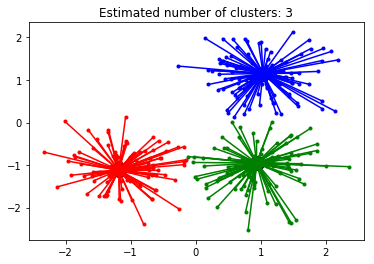

In [8]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()